# Bank Customer Churn Analysis and Prediction

The objective of this analysis is to investigate and gain insights into the major factors impacting the bank's customer churn rate. Subsequently, the study aims to provide recommendations to the bank, thereby facilitating a reduction in churn rate and improving customer retention.

In addition, a machine learning model is deployed to accurately predict customer churn.

In [134]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("packages imported successfully.")

packages imported successfully.


In [135]:
#Importing the dataset
bank_data = pd.read_csv("Customer_Churn_Records.csv")
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [136]:
bank_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [137]:
bank_data.shape

(10000, 18)

In [138]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [139]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [140]:
bank_data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [141]:
bank_data.duplicated().sum()

0

There are no duplicates or null values.

In [142]:
#Dropping columns that are irrelavant for the analysis
df = bank_data.drop(columns={'RowNumber', 'Surname'})
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Performing Exploratory Data Analysis

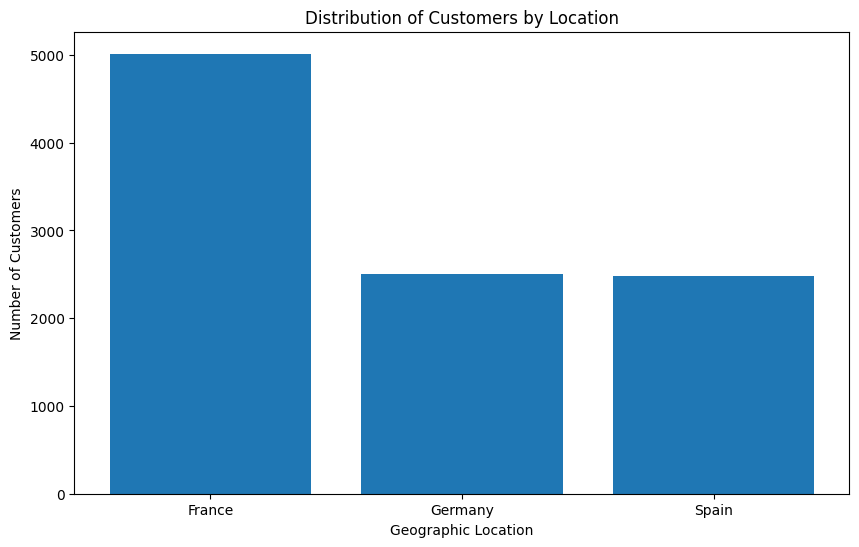

In [143]:
# Plotting a bar chart for the geography attribute
plt.figure(figsize =(10,6))
geography_counts = df['Geography'].value_counts()
plt.bar(geography_counts.index, geography_counts.values)
plt.xlabel('Geographic Location')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Location')
plt.show()

Majority of the bank customers are from France.

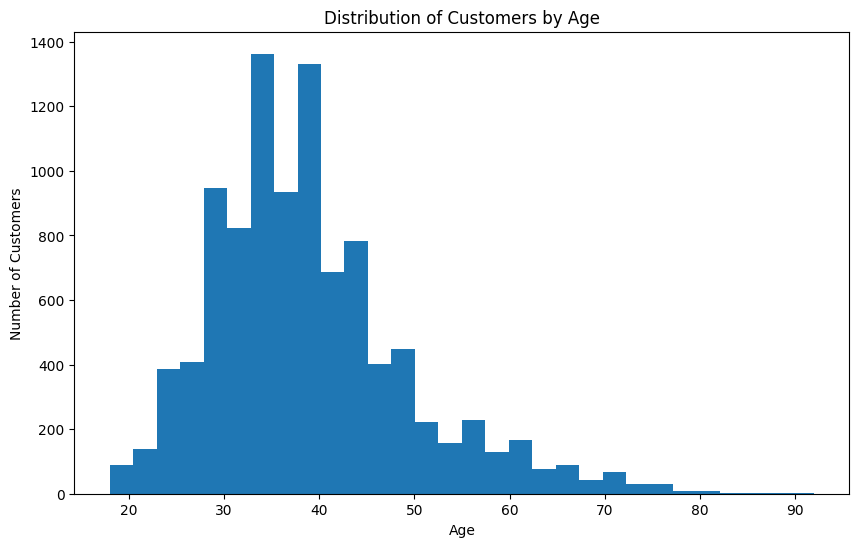

In [144]:
# Plotting a histogram for the age distribution
plt.figure(figsize =(10,6))
plt.hist(df['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age')
plt.show()

Majority of the customers are between the ages 24-50. This is valid as people above the age of 24 start working and hence need a bank account.

<Axes: xlabel='Card Type', ylabel='Number of Customers'>

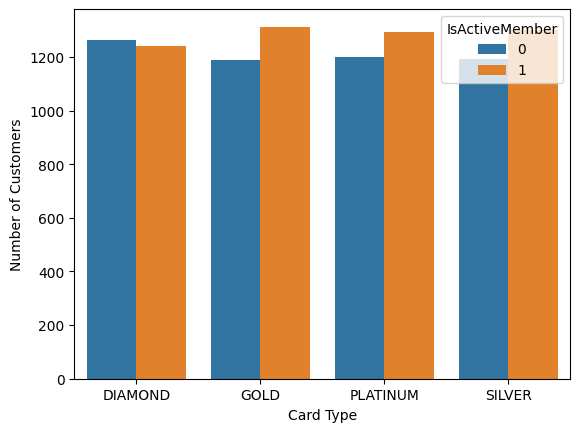

In [145]:
# Plotting a bar chart for card type and active status
active_card_member = df.groupby(['Card Type', 'IsActiveMember']).size().reset_index(name='Number of Customers')
sns.barplot(data= active_card_member, x= 'Card Type', y = 'Number of Customers', hue= 'IsActiveMember')

This shows that only in the diamond category, there are more inactive members than active ones. Except for this, most members are active in other categories. This may be because the benefits offered in this card type are not what the customers are looking for.

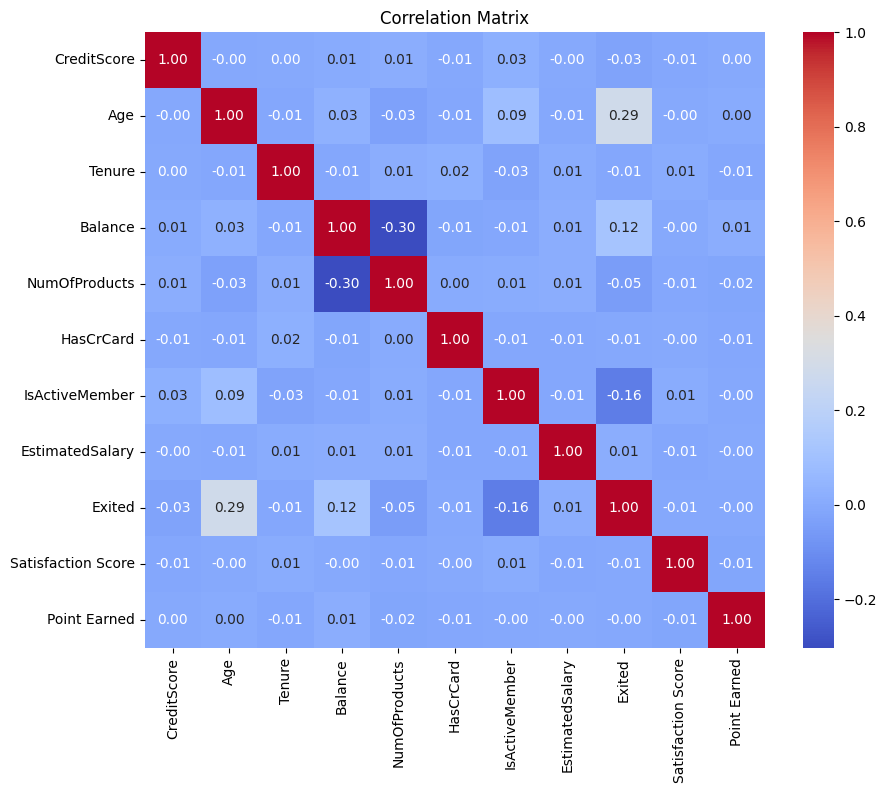

In [146]:
num_attributes = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Satisfaction Score', 'Point Earned']]
correlation_matrix = num_attributes.corr()

#Plotting correlation matrix
plt.figure(figsize =(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows that there is not a good linear relationship between attributes. However, there is a relatively strong correlation between the churn rate and age as well as churn rate and account balance which will be explored further.
* This could mean that there might be a combination of factors that are leading to the customer churn.

## Analyzing Customer Churn Rate

In [147]:
#Replacing 'Yes' and 'No' with 0 and 1's
df.Exited[df.Exited == 'No'] = 0
df.Exited[df.Exited == 'Yes'] = 1
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


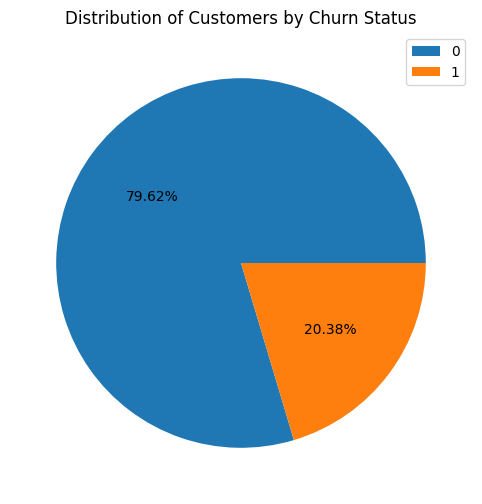

In [148]:
# Plotting the distribution of customers by churn status
plt.figure(figsize =(10,6))
churn_counts = df['Exited'].value_counts()
plt.pie(churn_counts.values, autopct='%1.2f%%')
plt.legend( loc = 'upper right', labels=churn_counts.index)
plt.title('Distribution of Customers by Churn Status')
plt.show()

This shows that 20% of the customers churned out. This could be due to various reasons that will be explored in the following analysis.

<Axes: xlabel='AgeGroup', ylabel='Number of Customers'>

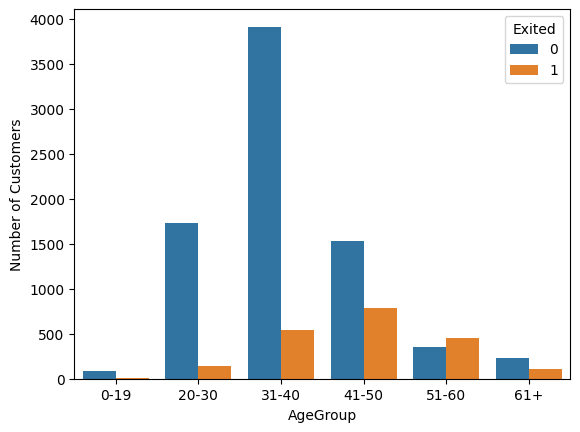

In [149]:
# Plotting a bar chart for the age attribute
# Creating age groups
age_bins = [0, 20, 30, 40, 50, 60, 70]
age_labels = ['0-19', '20-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

customer_count_age_exitstatus = df.groupby(['AgeGroup', 'Exited']).size().reset_index(name='Number of Customers')
sns.barplot(data= customer_count_age_exitstatus, x= 'AgeGroup', y = 'Number of Customers', hue= 'Exited')

Most of the customers that churned out are between the ages of 31 to 60 with the mojority being in the age group of 41-50. This could be due to various reasons such as:
* Changes in banking needs: Most people in this age group may be relocating, buying homes, have changes in financical needs and goals and hence may need different services than the current ones offered.
* Better offers in other banks: They may be attracted by other bank offers/promotions and services that may be more suitable to their needs now that they have higher incomes and more savings.
* Unsatisfactory services: If the customers feel dissatisfied due to issues like poor customer service, inconvenient branch locations, irrelevant benefits or poor quality products/services, customers are more likely to switch banks.

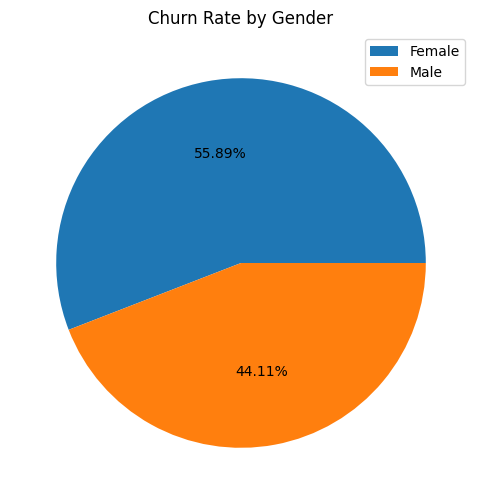

In [150]:
# Plotting the churn rate by gender
plt.figure(figsize =(10,6))
churn_rate_gender = df.groupby('Gender')['Exited'].sum()
plt.pie(churn_rate_gender.values, autopct='%1.2f%%')
plt.legend( loc = 'upper right', labels=churn_rate_gender.index)
plt.title('Churn Rate by Gender')
plt.show()

More than 50% of the churned customers are females. 
* This could be due to various factors such as life transitions, inadequate trust and security offered by the bank, or dissatisfactory customer service experience.

<Axes: xlabel='Card Type', ylabel='Churn Rate'>

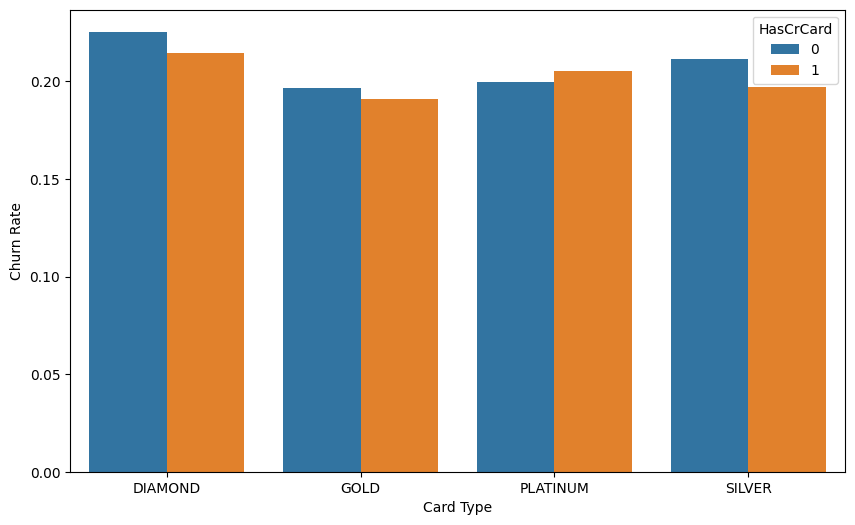

In [151]:
# Plotting the churn rate by card type
plt.figure(figsize =(10,6))
churn_rate_cardtype = df.groupby(['Card Type','HasCrCard'])['Exited'].mean().reset_index(name='Churn Rate')
sns.barplot(data= churn_rate_cardtype, x= 'Card Type', y = 'Churn Rate', hue= 'HasCrCard')

We can see that the Diamond Card type has the highest churn rate of just over 20% and the churn rate is higher for customers who do not have credit cards. This could be due to various reasons duch as high membership fees, benefits that may not be very attractive to customers, etc.

In [152]:
#Plotting churn rate by tenure
churn_rate_tenure = df.groupby(['Tenure'])['Exited'].mean().reset_index(name='Churn Rate')
fig = px.scatter(churn_rate_tenure, x='Tenure', y='Churn Rate', title='Churn Rate by Tenure')
fig.update_layout(xaxis_title='Tenure', yaxis_title='Churn Rate')
fig.show()

There is no significant relationship between the tenure and churn rate. Hence, this proves that tenure is not the reason for the customer churn. However, retaining existing customers is always beneficial.

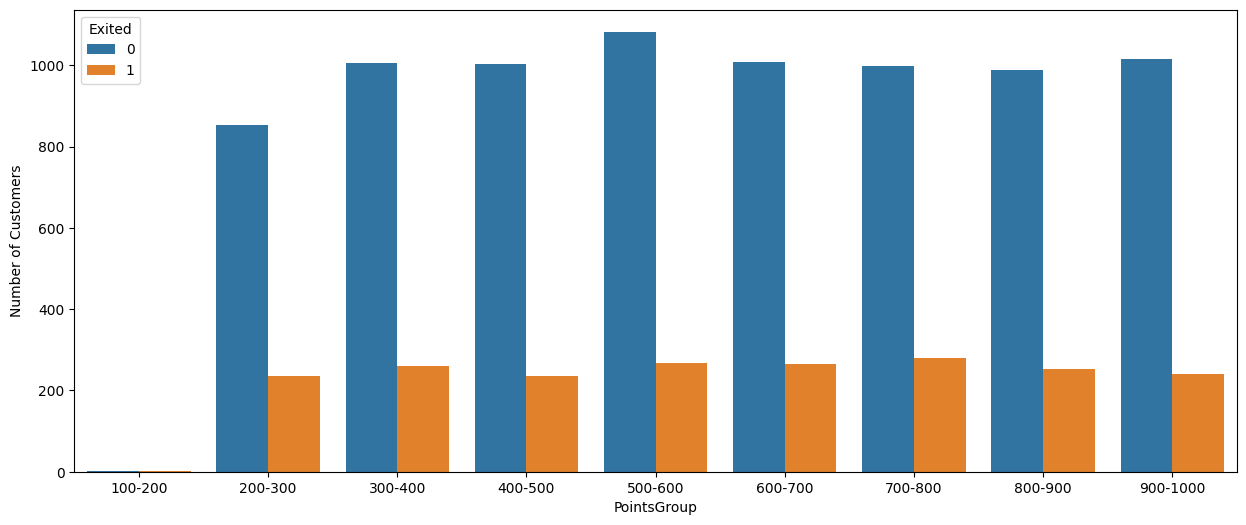

In [153]:
# Plotting a bar chart for the points attribute
plt.figure(figsize=(15, 6))

# Creating points groups
points_bins = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1001]
points_labels = ['100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000']
df['PointsGroup'] = pd.cut(df['Point Earned'], bins=points_bins, labels=points_labels)

customer_count_points = df.groupby(['PointsGroup', 'Exited']).size().reset_index(name='Number of Customers')
sns.barplot(data= customer_count_points, x= 'PointsGroup', y = 'Number of Customers', hue= 'Exited')

plt.show()

The analysis shows that there is no significant difference in the churn rate with respect to the points earned.

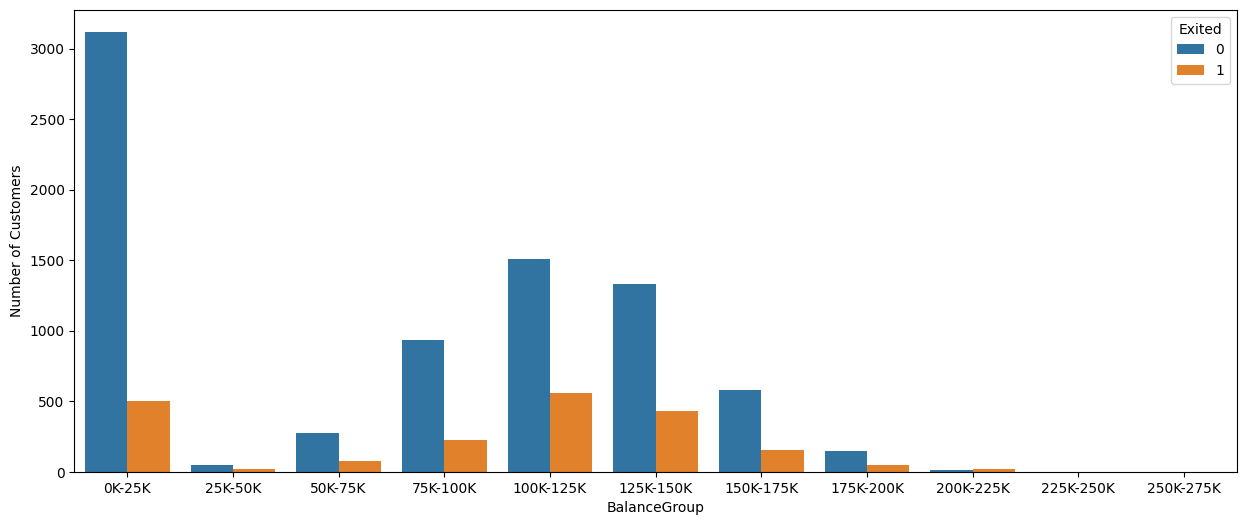

In [154]:
#Plotting churn rate by account balance
# Creating balance groups
plt.figure(figsize=(15, 6))
balance_bins = [-1, 25000,  50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000]
balance_bins.sort()
balance_labels = ['0K-25K', '25K-50K', '50K-75K', '75K-100K', '100K-125K', '125K-150K', '150K-175K', '175K-200K', '200K-225K', '225K-250K', '250K-275K']
df['BalanceGroup'] = pd.cut(df['Balance'], bins=balance_bins, labels=balance_labels)

churn_rate_balance = df.groupby(['BalanceGroup', 'Exited']).size().reset_index(name='Number of Customers')
sns.barplot(data= churn_rate_balance, x= 'BalanceGroup', y = 'Number of Customers', hue= 'Exited')
plt.show()

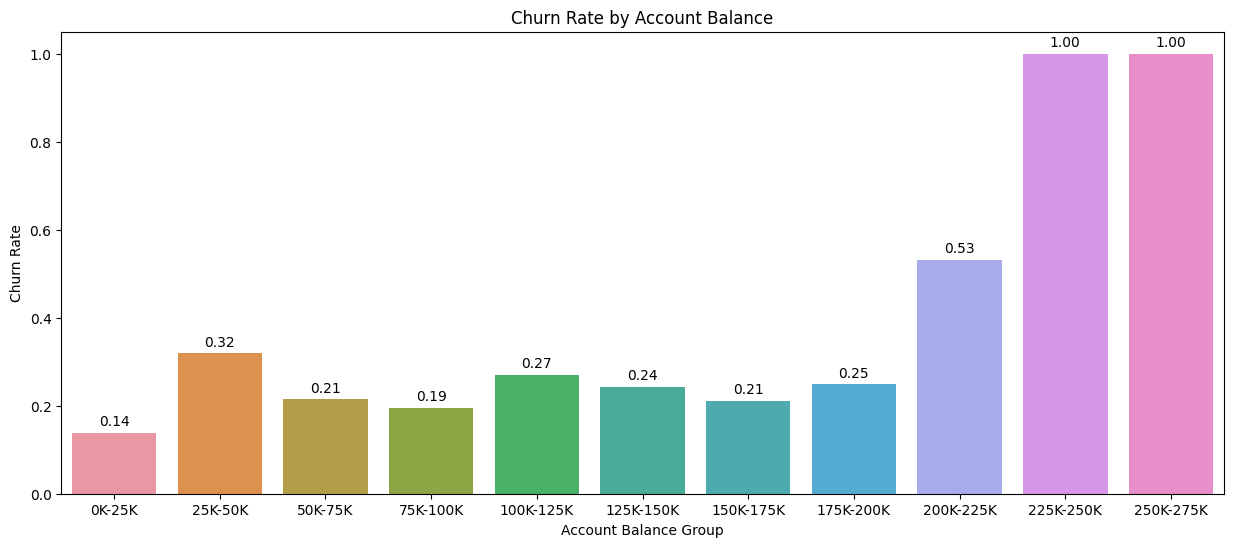

In [155]:
#Plotting churn rate by account balance
# Creating balance groups
plt.figure(figsize=(15, 6))
balance_bins = [-1, 25000,  50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000]
balance_bins.sort()
balance_labels = ['0K-25K', '25K-50K', '50K-75K', '75K-100K', '100K-125K', '125K-150K', '150K-175K', '175K-200K', '200K-225K', '225K-250K', '250K-275K']
df['BalanceGroup'] = pd.cut(df['Balance'], bins=balance_bins, labels=balance_labels)

churn_rate_balance = df.groupby(['BalanceGroup'])['Exited'].mean().reset_index(name='Churn Rate')

plots = sns.barplot(data= churn_rate_balance, x= 'BalanceGroup', y = 'Churn Rate')
 
# Iterating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Account Balance Group")
 
# Setting the label for y-axis
plt.ylabel("Churn Rate")
 
# Setting the title for the graph
plt.title("Churn Rate by Account Balance")
 
# Finally showing the plot
plt.show()

There is no significant correlation between the account balance and churn rate.

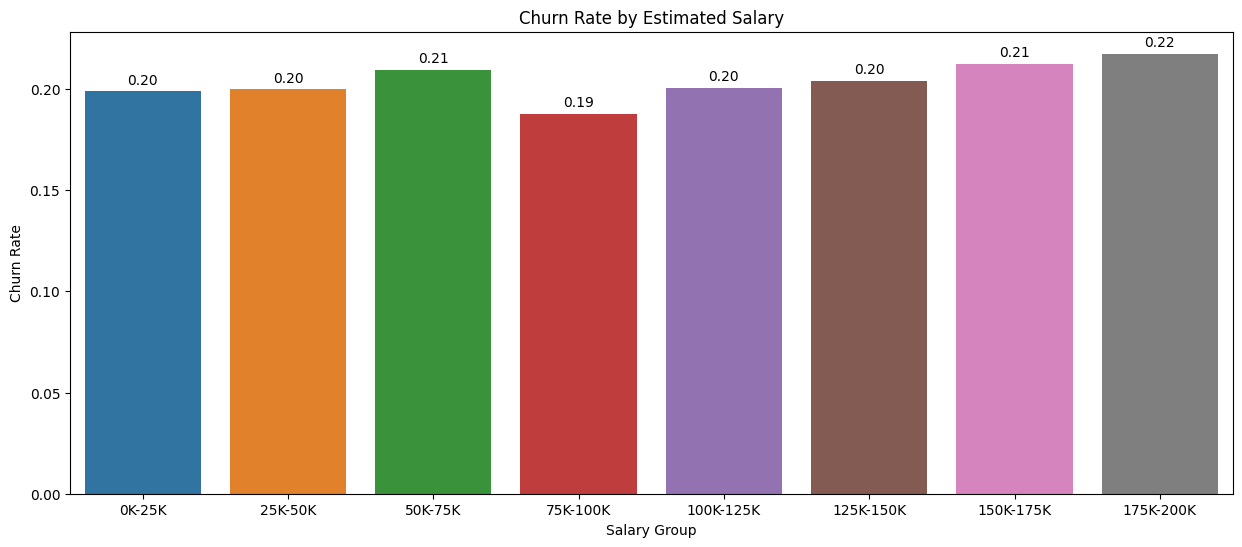

In [156]:
#Plotting churn rate by Salary
# Creating salary groups
plt.figure(figsize=(15, 6))
salary_bins = [-1, 25000,  50000, 75000, 100000, 125000, 150000, 175000, 200000]
salary_bins.sort()
salary_labels = ['0K-25K', '25K-50K', '50K-75K', '75K-100K', '100K-125K', '125K-150K', '150K-175K', '175K-200K']
df['SalaryGroup'] = pd.cut(df['EstimatedSalary'], bins=salary_bins, labels=salary_labels)

churn_rate_salary = df.groupby(['SalaryGroup'])['Exited'].mean().reset_index(name='Churn Rate')

plots = sns.barplot(data= churn_rate_salary, x= 'SalaryGroup', y = 'Churn Rate')
 
# Iterating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Salary Group")
 
# Setting the label for y-axis
plt.ylabel("Churn Rate")
 
# Setting the title for the graph
plt.title("Churn Rate by Estimated Salary")
 
# Finally showing the plot
plt.show()

From the plot, it is clear that there isn't a significant correlation between estimated salary and churn rate. However, there is a marginal upward trend in the churn rate as the salaries increase. In order to gain a more comprehensive understanding of this relationship, it is imperative for the bank to conduct further investigations by speaking to the customers.

In [157]:
#Exporting updated dataframe to Excel file
import pandas as pd

# Specifying the filename for the Excel file
output_file = 'Updated_Customer_Churn_Records.xlsx'

# Exporting the DataFrame to Excel
df.to_excel(output_file, index=False)

print(f"DataFrame successfully exported to {output_file}.")

DataFrame successfully exported to Updated_Customer_Churn_Records.xlsx.


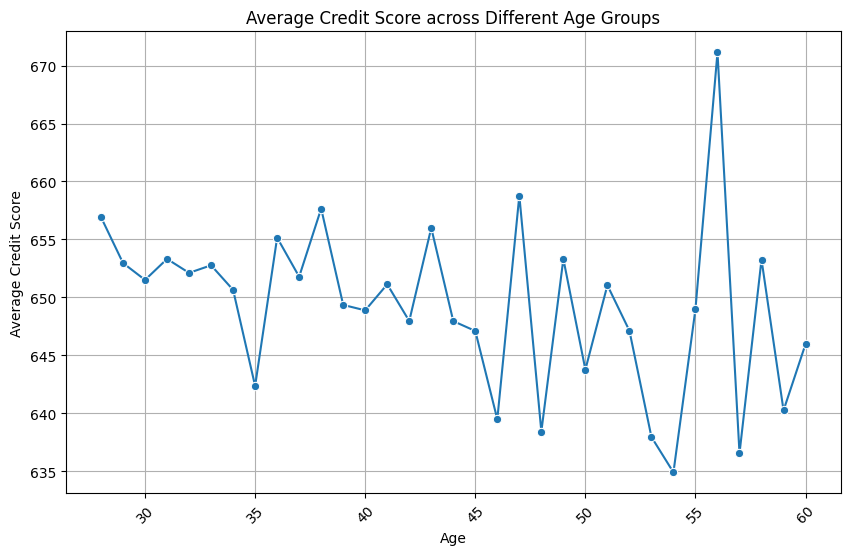

In [158]:
# Calculating average credit score for each age group
from scipy import stats


age_segment = df[(df['Age'] >= 28) & (df['Age'] <= 60)]

# Calculate z-scores for 'Age' column within the age_segment dataset
z_scores = stats.zscore(age_segment['Age'])

# Define a threshold for outliers (e.g., z-score greater than 3 or -3)
threshold = 3

# Filter out rows where absolute z-score is greater than the threshold
age_segment_no_outliers = age_segment[abs(z_scores) <= threshold]

avg_credit_score_by_age = age_segment_no_outliers.groupby('Age')['CreditScore'].mean().reset_index()

# Create a line plot to show the average credit score across different age groups
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='CreditScore', data=avg_credit_score_by_age, marker='o')
plt.title('Average Credit Score across Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Average Credit Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The average credit score is highest among the age group of 56 and lowest at the age group of 54 according to this analysis, and in general has a downward trend. However, the reasons for this needs to be explored by the bank. 

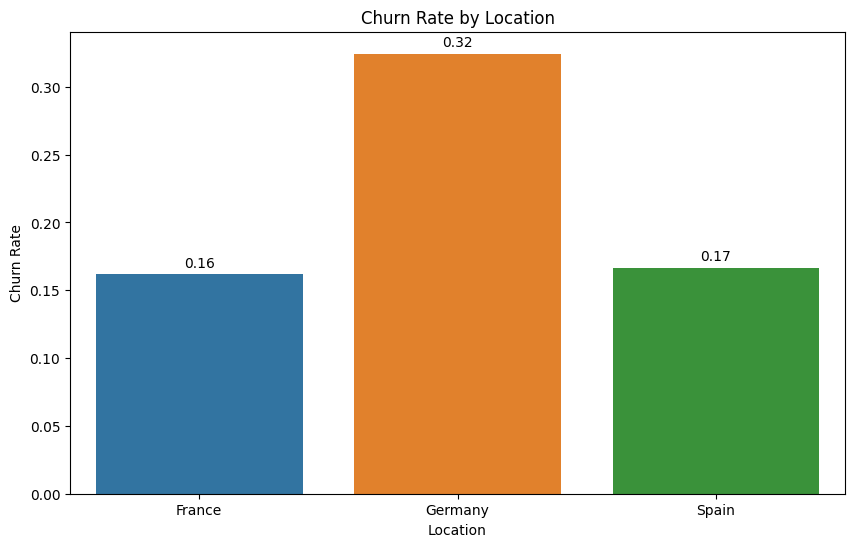

In [159]:
#Plotting churn rate by Location
plt.figure(figsize =(10,6))
churn_rate_location = df.groupby(['Geography'])['Exited'].mean().reset_index(name='Churn Rate')

plots = sns.barplot(data= churn_rate_location, x= 'Geography', y = 'Churn Rate')
 
# Iterating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Location")
 
# Setting the label for y-axis
plt.ylabel("Churn Rate")
 
# Setting the title for the graph
plt.title("Churn Rate by Location")
 
# Finally showing the plot
plt.show()

This shows that Germany has the highest churn rate. 32% of its customers have churned out. This could be due to the market condition in Germany or customer dissatisfaction.

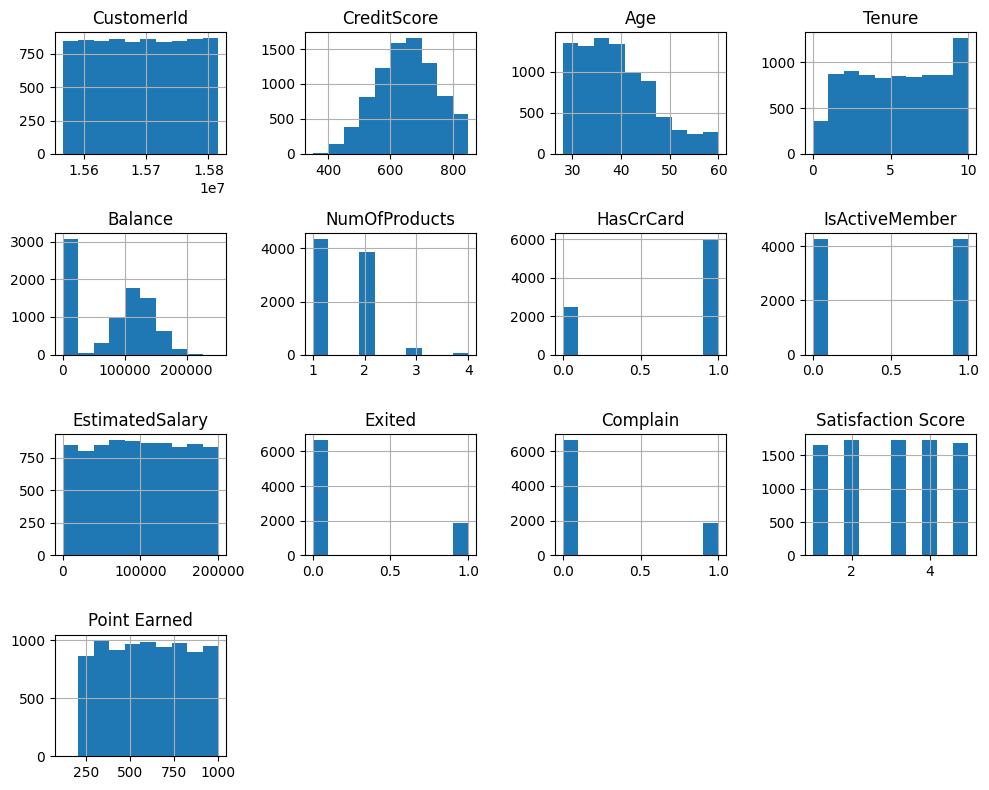

In [160]:
# Plotting histograms for numerical columns
age_segment_no_outliers.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

## Building a prediction model

In [161]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,PointsGroup,BalanceGroup,SalaryGroup
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,41-50,400-500,0K-25K,100K-125K
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,41-50,400-500,75K-100K,100K-125K
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,41-50,300-400,150K-175K,100K-125K
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,31-40,300-400,0K-25K,75K-100K
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,41-50,400-500,125K-150K,75K-100K


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CustomerId          10000 non-null  int64   
 1   CreditScore         10000 non-null  int64   
 2   Geography           10000 non-null  object  
 3   Gender              10000 non-null  object  
 4   Age                 10000 non-null  int64   
 5   Tenure              10000 non-null  int64   
 6   Balance             10000 non-null  float64 
 7   NumOfProducts       10000 non-null  int64   
 8   HasCrCard           10000 non-null  int64   
 9   IsActiveMember      10000 non-null  int64   
 10  EstimatedSalary     10000 non-null  float64 
 11  Exited              10000 non-null  int64   
 12  Complain            10000 non-null  int64   
 13  Satisfaction Score  10000 non-null  int64   
 14  Card Type           10000 non-null  object  
 15  Point Earned        10000 non-null  i

#### Performing data standardization

In [163]:
from sklearn.preprocessing import StandardScaler

# Excluding CustomerId from the list of numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('CustomerId')

# Extracting non-numeric columns from the original DataFrame
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns
data_non_numeric = df[non_numeric_columns]

# Extracting the CustomerId column
customer_id_column = df['CustomerId']

# Extracting and standardizing numeric columns (excluding CustomerId)
data_numeric = df[numeric_columns]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
data_scaled = pd.DataFrame(data_scaled, columns=numeric_columns)

# Concatenating the CustomerId column, standardized numeric columns, and non-numeric columns
df_std = pd.concat([customer_id_column, data_non_numeric, data_scaled], axis=1)

df_std.head()

,CustomerId,Geography,Gender,Card Type,AgeGroup,PointsGroup,BalanceGroup,SalaryGroup,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,15634602,France,Female,DIAMOND,41-50,400-500,0K-25K,100K-125K,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.976555,1.972908,-0.721130,-0.630839
1,15647311,Spain,Female,DIAMOND,41-50,400-500,75K-100K,100K-125K,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505931,1.972908,-0.009816,-0.666251
2,15619304,France,Female,DIAMOND,41-50,300-400,150K-175K,100K-125K,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.976555,1.972908,-0.009816,-1.015942
3,15701354,France,Female,GOLD,31-40,300-400,0K-25K,75K-100K,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505931,-0.506866,1.412812,-1.135457
4,15737888,Spain,Female,GOLD,41-50,400-500,125K-150K,75K-100K,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505931,-0.506866,1.412812,-0.803472


In [164]:
df_std.shape

(10000, 20)

#### Performing feature selection

In [165]:
df_std.columns

Index(['CustomerId', 'Geography', 'Gender', 'Card Type', 'AgeGroup',
       'PointsGroup', 'BalanceGroup', 'SalaryGroup', 'CreditScore', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Point Earned'],
      dtype='object')

In [166]:
# Dropping unnecessary variables 
data = df_std.drop(['AgeGroup', 'PointsGroup', 'BalanceGroup', 'SalaryGroup'], axis=1)
data.head()

,CustomerId,Geography,Gender,Card Type,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,15634602,France,Female,DIAMOND,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.976555,1.972908,-0.721130,-0.630839
1,15647311,Spain,Female,DIAMOND,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505931,1.972908,-0.009816,-0.666251
2,15619304,France,Female,DIAMOND,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.976555,1.972908,-0.009816,-1.015942
3,15701354,France,Female,GOLD,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505931,-0.506866,1.412812,-1.135457
4,15737888,Spain,Female,GOLD,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505931,-0.506866,1.412812,-0.803472


In [167]:
# Selecting columns as predictors and outcome variables
predictors = ['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned']
outcome = 'Exited'

In [168]:
predictors

['CustomerId',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Complain',
 'Satisfaction Score',
 'Card Type',
 'Point Earned']

In [169]:
outcome

'Exited'

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Card Type           10000 non-null  object 
 4   CreditScore         10000 non-null  float64
 5   Age                 10000 non-null  float64
 6   Tenure              10000 non-null  float64
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  float64
 9   HasCrCard           10000 non-null  float64
 10  IsActiveMember      10000 non-null  float64
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  float64
 13  Complain            10000 non-null  float64
 14  Satisfaction Score  10000 non-null  float64
 15  Point Earned        10000 non-null  float64
dtypes: fl

In [171]:
# Dummy variable creation
X = pd.get_dummies(data[predictors], drop_first=True)
y = df[outcome]

In [172]:
X

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.972908,-0.721130,-0.630839,False,False,False,False,False,False
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,1.972908,-0.009816,-0.666251,False,True,False,False,False,False
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.972908,-0.009816,-1.015942,False,False,False,False,False,False
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.506866,1.412812,-1.135457,False,False,False,True,False,False
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.506866,1.412812,-0.803472,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.506866,-1.432445,-1.356781,False,False,True,False,False,False
9996,15569892,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.506866,1.412812,0.728088,False,False,True,False,True,False
9997,15584532,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.972908,-0.009816,-0.188192,False,False,False,False,False,True
9998,15682355,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.972908,-0.721130,-1.184148,True,False,True,True,False,False


In [173]:
X.shape

(10000, 18)

In [174]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   CreditScore         10000 non-null  float64
 2   Age                 10000 non-null  float64
 3   Tenure              10000 non-null  float64
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  float64
 6   HasCrCard           10000 non-null  float64
 7   IsActiveMember      10000 non-null  float64
 8   EstimatedSalary     10000 non-null  float64
 9   Complain            10000 non-null  float64
 10  Satisfaction Score  10000 non-null  float64
 11  Point Earned        10000 non-null  float64
 12  Geography_Germany   10000 non-null  bool   
 13  Geography_Spain     10000 non-null  bool   
 14  Gender_Male         10000 non-null  bool   
 15  Card Type_GOLD      10000 non-null  bool   
 16  Card 

In [175]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [176]:
y.shape

(10000,)

In [177]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Exited
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [178]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [179]:
train_X

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
2694,15721585,-0.233100,-0.946079,-0.695982,0.587571,0.807737,-1.547768,0.970243,0.428793,-0.506866,-0.721130,-1.117751,True,False,True,False,True,False
5140,15617790,-0.253794,-0.946079,-0.350204,0.469296,0.807737,-1.547768,-1.030670,-1.025698,-0.506866,-1.432445,1.024661,False,False,False,False,True,False
2568,15775905,-0.398649,0.770285,0.341352,0.858075,-0.911583,0.646092,0.970243,-0.944919,1.972908,0.701498,0.435941,True,False,False,False,True,False
3671,15616666,-0.046858,1.247053,0.341352,0.565012,0.807737,-1.547768,0.970243,-0.551632,-0.506866,-1.432445,-1.648928,True,False,False,False,False,False
7427,15664720,0.656722,-0.564665,1.032908,0.729735,-0.911583,-1.547768,-1.030670,1.085507,-0.506866,1.412812,-0.453780,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,15646859,-0.305528,0.770285,0.687130,0.494875,-0.911583,0.646092,0.970243,-0.578897,-0.506866,1.412812,0.860882,True,False,True,False,False,False
7813,15592751,0.346319,2.295943,-0.695982,0.076287,-0.911583,0.646092,-1.030670,-0.529442,1.972908,-0.721130,1.166309,True,False,False,False,True,False
905,15675964,0.222158,0.579578,1.378686,-1.225848,-0.911583,0.646092,0.970243,-0.140200,1.972908,-1.432445,-0.927413,False,False,False,False,True,False
5192,15607884,0.129037,0.007457,1.032908,-1.225848,0.807737,0.646092,0.970243,0.018757,-0.506866,1.412812,-0.714942,False,False,False,False,False,True


In [180]:
valid_X

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
9953,15655952,-1.040149,0.770285,-1.041760,-1.225848,0.807737,0.646092,0.970243,-0.052740,-0.506866,-0.009816,0.829897,False,False,True,True,False,False
3850,15775293,0.304932,-0.469311,-0.695982,1.070724,-0.911583,0.646092,-1.030670,-0.583648,-0.506866,-1.432445,0.387249,False,False,True,False,False,True
4962,15665088,-1.236738,0.293517,-1.041760,-1.225848,0.807737,-1.547768,0.970243,-0.166113,-0.506866,-0.721130,-0.223604,False,False,False,True,False,False
3886,15720941,0.615335,-0.469311,1.032908,1.143493,0.807737,-1.547768,0.970243,-1.713315,-0.506866,1.412812,1.369926,True,False,True,True,False,False
5437,15733476,-1.112576,-0.850726,0.341352,-0.048159,-0.911583,0.646092,0.970243,1.332039,-0.506866,-0.009816,0.338558,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,15759717,1.163714,0.007457,0.687130,-1.225848,0.807737,0.646092,-1.030670,-1.402101,-0.506866,-0.721130,-1.308089,False,True,False,False,True,False
162,15630910,1.546545,0.960993,0.687130,0.505198,-0.911583,-1.547768,-1.030670,-0.921011,-0.506866,-0.009816,1.099911,False,False,False,False,True,False
7903,15618437,-0.864254,-0.469311,1.724464,-1.225848,0.807737,-1.547768,0.970243,1.069103,-0.506866,1.412812,-0.953972,False,True,True,False,False,False
2242,15714397,-0.305528,-0.850726,-1.041760,0.393116,0.807737,0.646092,0.970243,1.133190,-0.506866,-0.009816,0.546602,True,False,False,False,False,True


In [181]:
train_y

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [182]:
valid_y

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
3919    0
162     0
7903    0
2242    0
2745    0
Name: Exited, Length: 2000, dtype: int64

#### Performing feature selection

In [183]:
# Using Backward elimination
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: CustomerId, CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Complain, Satisfaction Score, Point Earned, Geography_Germany, Geography_Spain, Gender_Male, Card Type_GOLD, Card Type_PLATINUM, Card Type_SILVER
Start: score=-30783.37
Step: score=-30785.37, remove EstimatedSalary
Step: score=-30787.37, remove Card Type_PLATINUM
Step: score=-30789.33, remove Gender_Male
Step: score=-30791.26, remove Geography_Germany
Step: score=-30793.08, remove Card Type_GOLD
Step: score=-30794.88, remove Geography_Spain
Step: score=-30796.65, remove HasCrCard
Step: score=-30798.15, remove Tenure
Step: score=-30799.64, remove CreditScore
Step: score=-30800.61, remove NumOfProducts
Step: score=-30801.61, remove Balance
Step: score=-30802.55, remove CustomerId
Step: score=-30802.55, remove None
['Age', 'IsActiveMember', 'Complain', 'Satisfaction Score', 'Point Earned', 'Card Type_SILVER']


In [184]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

               Mean Error (ME) : -0.0005
Root Mean Squared Error (RMSE) : 0.0446
     Mean Absolute Error (MAE) : 0.0040


In [185]:
# Using Forward selection 

#The initial model is the constant model - this requires special handling in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: CustomerId, CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Complain, Satisfaction Score, Point Earned, Geography_Germany, Geography_Spain, Gender_Male, Card Type_GOLD, Card Type_PLATINUM, Card Type_SILVER
Start: score=8131.74, constant
Step: score=-30793.14, add Complain
Step: score=-30799.18, add Age
Step: score=-30800.46, add IsActiveMember
Step: score=-30801.71, add Point Earned
Step: score=-30802.35, add Satisfaction Score
Step: score=-30802.55, add Card Type_SILVER
Step: score=-30802.55, add None
['Complain', 'Age', 'IsActiveMember', 'Point Earned', 'Satisfaction Score', 'Card Type_SILVER']


In [186]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

               Mean Error (ME) : -0.0005
Root Mean Squared Error (RMSE) : 0.0446
     Mean Absolute Error (MAE) : 0.0040


In [187]:
# Using Stepwise selection
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: CustomerId, CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Complain, Satisfaction Score, Point Earned, Geography_Germany, Geography_Spain, Gender_Male, Card Type_GOLD, Card Type_PLATINUM, Card Type_SILVER
Start: score=8131.74, constant
Step: score=-30793.14, add Complain
Step: score=-30799.18, add Age
Step: score=-30800.46, add IsActiveMember
Step: score=-30801.71, add Point Earned
Step: score=-30802.35, add Satisfaction Score
Step: score=-30802.55, add Card Type_SILVER
Step: score=-30802.55, unchanged None
['Complain', 'Age', 'IsActiveMember', 'Point Earned', 'Satisfaction Score', 'Card Type_SILVER']


In [188]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

               Mean Error (ME) : -0.0005
Root Mean Squared Error (RMSE) : 0.0446
     Mean Absolute Error (MAE) : 0.0040


The best features for the model are Complain, Age, IsActiveMember, Point Earned, Satisfaction Score and Card Type_SILVER.

In [189]:
selected_features = ['Complain', 'Age', 'IsActiveMember', 'Point Earned', 'Satisfaction Score', 'Card Type']
selected_features

['Complain',
 'Age',
 'IsActiveMember',
 'Point Earned',
 'Satisfaction Score',
 'Card Type']

In [190]:
X

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.972908,-0.721130,-0.630839,False,False,False,False,False,False
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,1.972908,-0.009816,-0.666251,False,True,False,False,False,False
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.972908,-0.009816,-1.015942,False,False,False,False,False,False
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.506866,1.412812,-1.135457,False,False,False,True,False,False
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.506866,1.412812,-0.803472,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.506866,-1.432445,-1.356781,False,False,True,False,False,False
9996,15569892,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.506866,1.412812,0.728088,False,False,True,False,True,False
9997,15584532,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.972908,-0.009816,-0.188192,False,False,False,False,False,True
9998,15682355,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.972908,-0.721130,-1.184148,True,False,True,True,False,False


In [191]:
train_X

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
2694,15721585,-0.233100,-0.946079,-0.695982,0.587571,0.807737,-1.547768,0.970243,0.428793,-0.506866,-0.721130,-1.117751,True,False,True,False,True,False
5140,15617790,-0.253794,-0.946079,-0.350204,0.469296,0.807737,-1.547768,-1.030670,-1.025698,-0.506866,-1.432445,1.024661,False,False,False,False,True,False
2568,15775905,-0.398649,0.770285,0.341352,0.858075,-0.911583,0.646092,0.970243,-0.944919,1.972908,0.701498,0.435941,True,False,False,False,True,False
3671,15616666,-0.046858,1.247053,0.341352,0.565012,0.807737,-1.547768,0.970243,-0.551632,-0.506866,-1.432445,-1.648928,True,False,False,False,False,False
7427,15664720,0.656722,-0.564665,1.032908,0.729735,-0.911583,-1.547768,-1.030670,1.085507,-0.506866,1.412812,-0.453780,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,15646859,-0.305528,0.770285,0.687130,0.494875,-0.911583,0.646092,0.970243,-0.578897,-0.506866,1.412812,0.860882,True,False,True,False,False,False
7813,15592751,0.346319,2.295943,-0.695982,0.076287,-0.911583,0.646092,-1.030670,-0.529442,1.972908,-0.721130,1.166309,True,False,False,False,True,False
905,15675964,0.222158,0.579578,1.378686,-1.225848,-0.911583,0.646092,0.970243,-0.140200,1.972908,-1.432445,-0.927413,False,False,False,False,True,False
5192,15607884,0.129037,0.007457,1.032908,-1.225848,0.807737,0.646092,0.970243,0.018757,-0.506866,1.412812,-0.714942,False,False,False,False,False,True


#### Selecting the best model

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Initializing models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Evaluating models
for name, model in models.items():
    print(f"Training {name}...")
    
    if name != 'Neural Network':
        model.fit(train_X, train_y)
    else:
        model.fit(train_X, train_y)
    
    pred_y = model.predict(valid_X if name != 'Neural Network' else valid_X)
    
    print(f"\n{classification_report(valid_y, pred_y)}")
    print(f"{name} Accuracy: {accuracy_score(valid_y, pred_y):.4f}\n")

Training Logistic Regression...

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1585
           1       0.00      0.00      0.00       415

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000

Logistic Regression Accuracy: 0.7925

Training Decision Tree...

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1585
           1       0.99      0.99      0.99       415

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Decision Tree Accuracy: 0.9970

Training Random Forest...

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1585
           1       0.99      1.00      1.00       415

    accuracy             

Hence, the Random Forest Classifier model is selected as it has the highest accuracy score of 99.8%.

#### Training the model and performing hyperparameter tuning

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, auc, precision_recall_curve


# Defining the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(train_X, train_y)

# Getting the best parameters and training the final model
best_params = grid_search.best_params_
final_rf_model = RandomForestClassifier(**best_params, random_state=42)
final_rf_model.fit(train_X, train_y)

# Making predictions on the test set
pred_y_rf = final_rf_model.predict(valid_X)

# Evaluating the final Random Forest model on the test set
print("Evaluation on the test set:")
print(f'Accuracy: {accuracy_score(valid_y, pred_y_rf):.4f}')
print(f'Precision: {precision_score(valid_y, pred_y_rf):.4f}')
print(f'Recall: {recall_score(valid_y, pred_y_rf):.4f}')
print(f'F1-score: {f1_score(valid_y, pred_y_rf):.4f}')

print("\nBest Hyperparameters:")
print(best_params)



scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
}

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Evaluation on the test set:
Accuracy: 0.9980
Precision: 0.9928
Recall: 0.9976
F1-score: 0.9952

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


The hyperparameter tuning did not make any difference to the performance of the model. Hence, the grid search best estimator can be selected as the final model. This model is efficient as the accuracy is 99.8%, precision is 99.3% and F1-score is 99.5%

[[1582    3]
 [   1  414]]


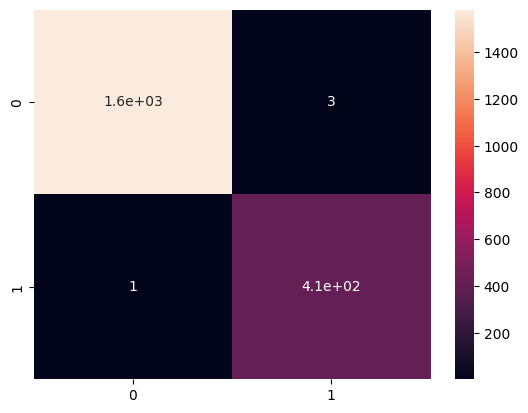

In [194]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(valid_y, pred_y_rf)
sns.heatmap(cm, annot=True)
print(cm)

In [195]:
# Selecting the final model
final_rf_model.fit(X, y)

RandomForestClassifier(n_estimators=50, random_state=42)

## Recommendations for the Bank:

* **Focus on retaining female customers:** Determine the factors contributing to the escalated churn rate observed among female customers, and devise effective solutions and customized marketing strategies to cater to their specific requirements.
* **Strengthen communication and informational programs:** Implement supplementary communication channels and educational initiatives aimed at enhancing customer knowledge regarding the comprehensive range of products and services provided. By fostering transparency and building trust, the bank can nurture customer loyalty and encourage retention.
* **Modify the marketing strategy and/or benefits of the products:** Optimize marketing strategies and strategically modify product benefits to effectively attract and engage the intended target customer segment.
* **Offer personalized financial plans that target the 40-65+ age group:** People in this age group have reached the peak of their financial goals and are nearing retirement. Hence, to retain this specific age group, it would be advantageous to offer personalized financial solutions such as investment plans, retirement planning techniques, etc. to help them accomplish their specific goals.
* **Improve customer satisfaction:** Establish a systematic approach of conducting regular feedback surveys to discern and promptly address customer issues and concerns. By proactively attending to their feedback, it is possible to mitigate churn rate and improve overall customer retention.

Implementing these strategies can improve customer satisfaction, bank and customer relationships and ultimtely customer retention.